In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../04_15/input_2500.csv")
if "Unnamed: 0" in df.columns:
    df.drop(columns= "Unnamed: 0", inplace=True)

In [5]:
df.head()

,Sentiment_Score,Success,High_Increase,Positive_Performance,Positive_Sentiment,Positive_Emotions,Sold,Bullish,Strength,Moderate_Increase,...,Supply,Negative_Outcomes,Electricvehicle,Finance,EV_tech,tax,late,risk,problem,Sentiment_Calc
0,-1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,24.9
1,-1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
2,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-7.4
3,-1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,-3.6
4,-1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,8.4


<h3> Label Distribution </h3>

In [7]:
label_counts = df["Sentiment_Score"].value_counts()

<Axes: xlabel='Sentiment_Score', ylabel='count'>

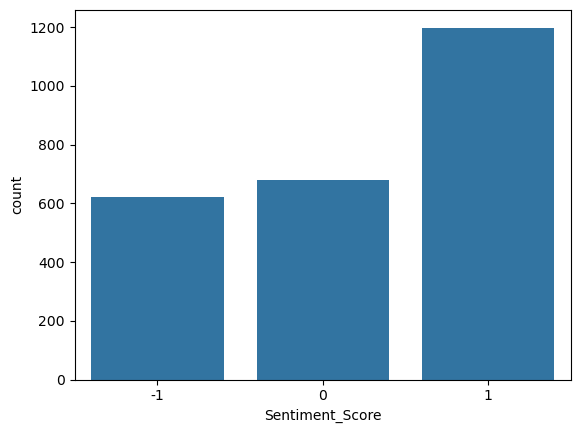

In [8]:
sns.countplot(data = df, x = "Sentiment_Score")

In [9]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

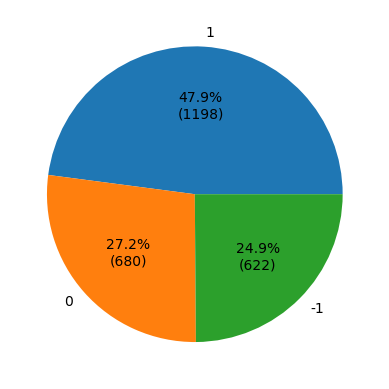

In [10]:
plt.pie(label_counts, labels=label_counts.index, autopct=autopct_format(label_counts))
plt.show()

In [11]:
features = df.drop(columns = ["Sentiment_Score", "Sentiment_Calc"])

In [12]:
features.head()

,Success,High_Increase,Positive_Performance,Positive_Sentiment,Positive_Emotions,Sold,Bullish,Strength,Moderate_Increase,Increase,...,Elon_Musk,Supply,Negative_Outcomes,Electricvehicle,Finance,EV_tech,tax,late,risk,problem
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
features["feature_count"] = features.sum(axis = 1)

In [14]:
features.head()

,Success,High_Increase,Positive_Performance,Positive_Sentiment,Positive_Emotions,Sold,Bullish,Strength,Moderate_Increase,Increase,...,Supply,Negative_Outcomes,Electricvehicle,Finance,EV_tech,tax,late,risk,problem,feature_count
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,12.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,15.0


<h3> Comparing Feature count per Record within the overall data, positive records, neutral records and negative records </h3>

In [16]:
features_pos = df[df["Sentiment_Score"] == 1].drop(columns = ["Sentiment_Score", "Sentiment_Calc"])
features_pos["feature_count"] = features_pos.sum(axis = 1)

features_neu = df[df["Sentiment_Score"] == 0].drop(columns = ["Sentiment_Score", "Sentiment_Calc"])
features_neu["feature_count"] = features_neu.sum(axis = 1)

features_neg = df[df["Sentiment_Score"] == -1].drop(columns = ["Sentiment_Score", "Sentiment_Calc"])
features_neg["feature_count"] = features_neg.sum(axis = 1)

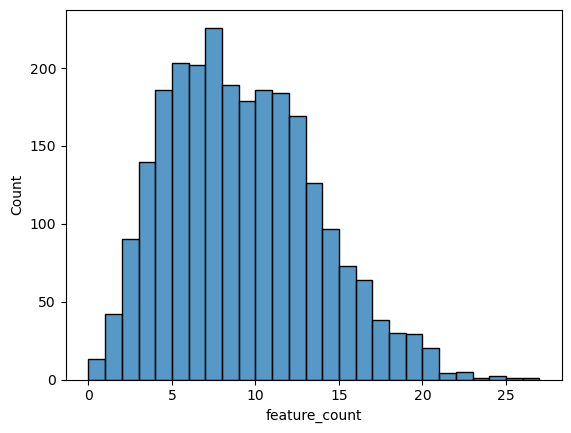

In [18]:
sns.histplot(data = features["feature_count"])
plt.yticks(list(range(0,250,50)))
plt.show()

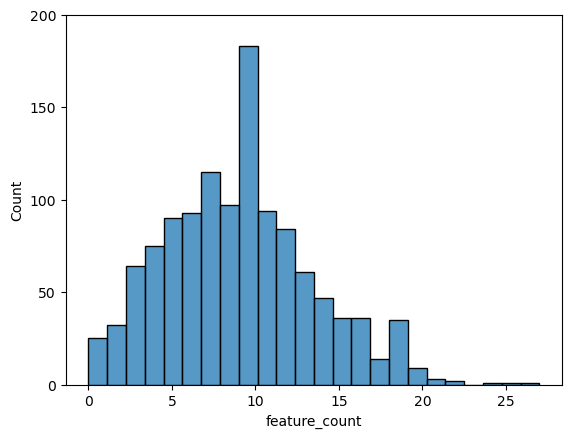

In [22]:
sns.histplot(data = features_pos["feature_count"])
plt.yticks(list(range(0,250,50)))
plt.show()

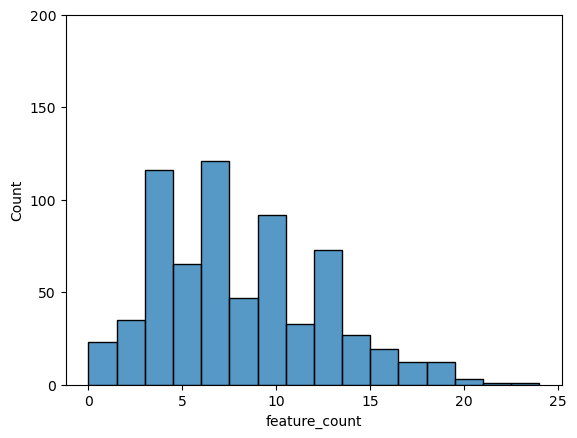

In [23]:
sns.histplot(data = features_neu["feature_count"])
plt.yticks(list(range(0,250,50)))
plt.show()

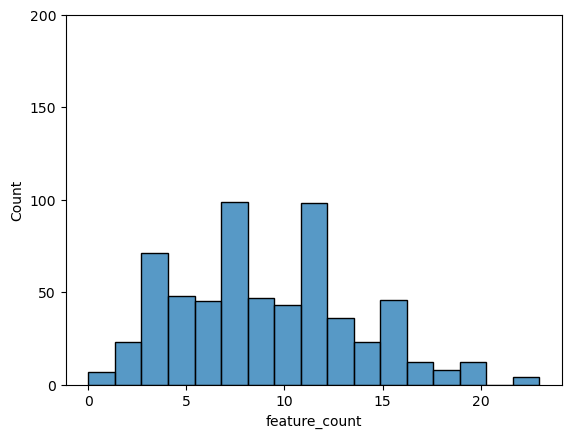

In [24]:
sns.histplot(data = features_neg["feature_count"])
plt.yticks(list(range(0,250,50)))
plt.show()

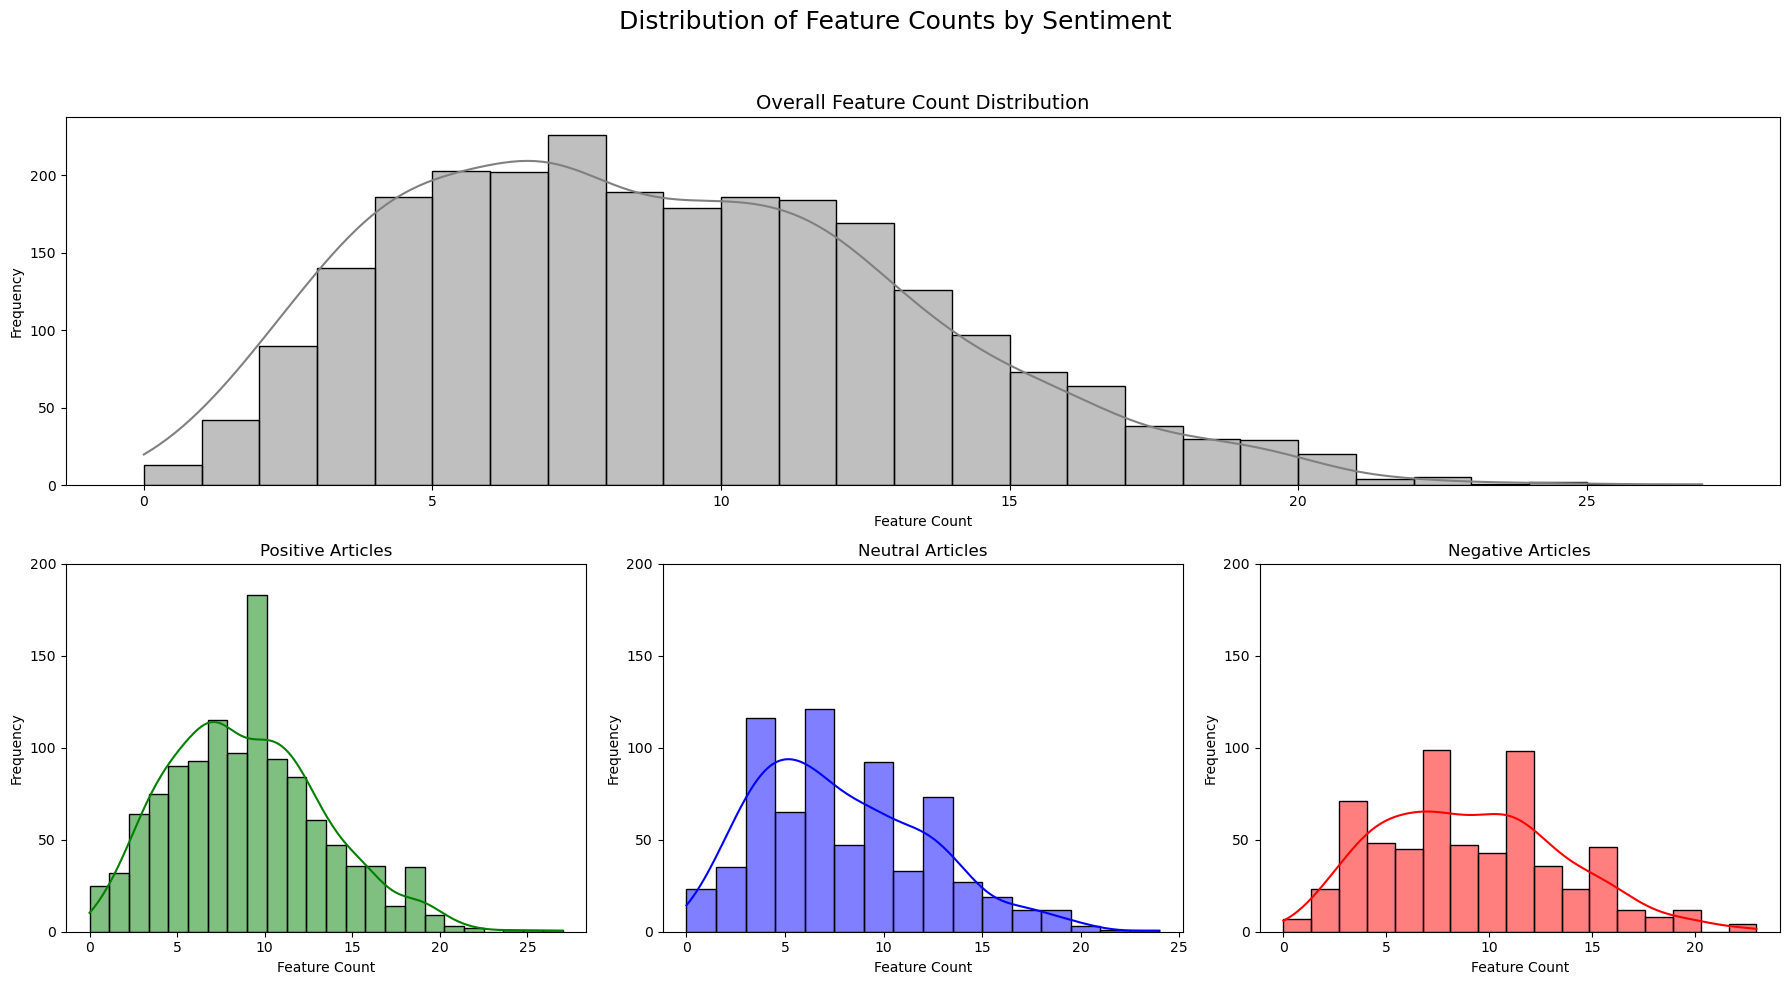

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you're not modifying the original df unintentionally
features = df.drop(columns=["Sentiment_Score", "Sentiment_Calc"]).copy()
features["feature_count"] = features.sum(axis=1)

# features_pos, features_neu, features_neg already created earlier
# Now we set up the layout: 1 row with 1 plot, 1 row with 3 plots
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3)
fig.suptitle('Distribution of Feature Counts by Sentiment', fontsize=18)

# Overall (Top row spanning all 3 columns)
ax0 = fig.add_subplot(gs[0, :])
sns.histplot(data=features["feature_count"], kde=True, color="gray", ax=ax0)
ax0.set_title("Overall Feature Count Distribution", fontsize=14)
ax0.set_ylabel("Frequency")
ax0.set_xlabel("Feature Count")

# Positive (Bottom left)
ax1 = fig.add_subplot(gs[1, 0])
sns.histplot(data=features_pos["feature_count"], kde=True, color="green", ax=ax1)
ax1.set_title("Positive Articles", fontsize=12)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Feature Count")

# Neutral (Bottom center)
ax2 = fig.add_subplot(gs[1, 1])
sns.histplot(data=features_neu["feature_count"], kde=True, color="blue", ax=ax2)
ax2.set_title("Neutral Articles", fontsize=12)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Feature Count")

# Negative (Bottom right)
ax3 = fig.add_subplot(gs[1, 2])
sns.histplot(data=features_neg["feature_count"], kde=True, color="red", ax=ax3)
ax3.set_title("Negative Articles", fontsize=12)
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Feature Count")

# Uniform y-axis ticks (optional)
for ax in [ax0, ax1, ax2, ax3]:
    ax.set_yticks(range(0, 250, 50))  # adjust if needed

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

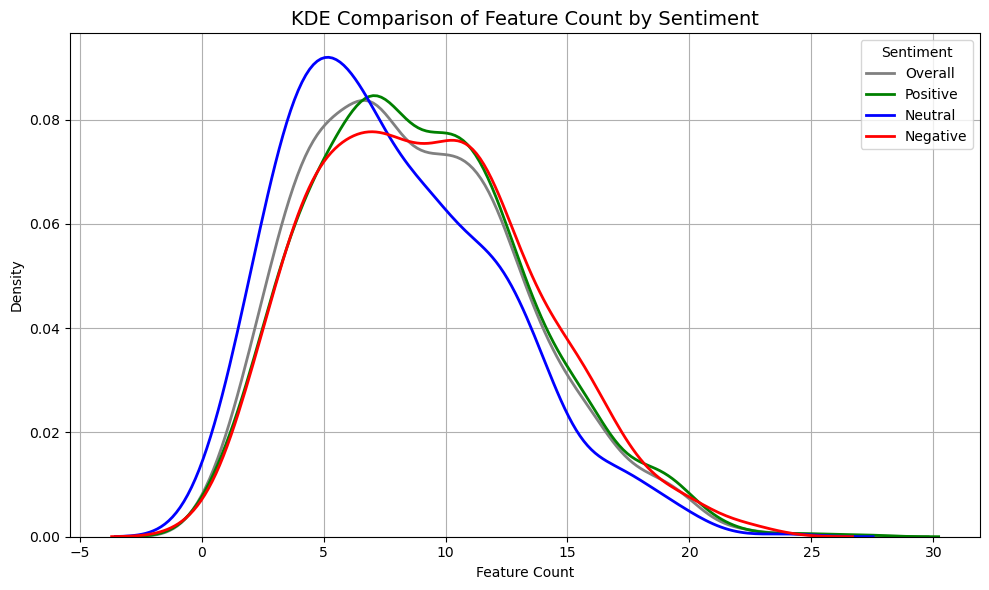

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(features["feature_count"], label="Overall", color="gray", linewidth=2)
sns.kdeplot(features_pos["feature_count"], label="Positive", color="green", linewidth=2)
sns.kdeplot(features_neu["feature_count"], label="Neutral", color="blue", linewidth=2)
sns.kdeplot(features_neg["feature_count"], label="Negative", color="red", linewidth=2)

plt.title("KDE Comparison of Feature Count by Sentiment", fontsize=14)
plt.xlabel("Feature Count")
plt.ylabel("Density")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Numeric Descriptions </h3>

In [36]:
features["feature_count"].describe(include = 'all')

count    2500.000000
mean        8.719600
std         4.440728
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        27.000000
Name: feature_count, dtype: float64

In [37]:
features_pos["feature_count"].describe(include = 'all')

count    1198.000000
mean        8.989983
std         4.425743
min         0.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        27.000000
Name: feature_count, dtype: float64

In [38]:
features_neu["feature_count"].describe(include = 'all')

count    680.000000
mean       7.835294
std        4.340709
min        0.000000
25%        4.000000
50%        7.000000
75%       11.000000
max       24.000000
Name: feature_count, dtype: float64

In [40]:
features_neg["feature_count"].describe(include = 'all')

count    622.000000
mean       9.165595
std        4.450107
min        0.000000
25%        6.000000
50%        9.000000
75%       12.000000
max       23.000000
Name: feature_count, dtype: float64

<h3> Box Plot to Visualize Distributionss </h3>

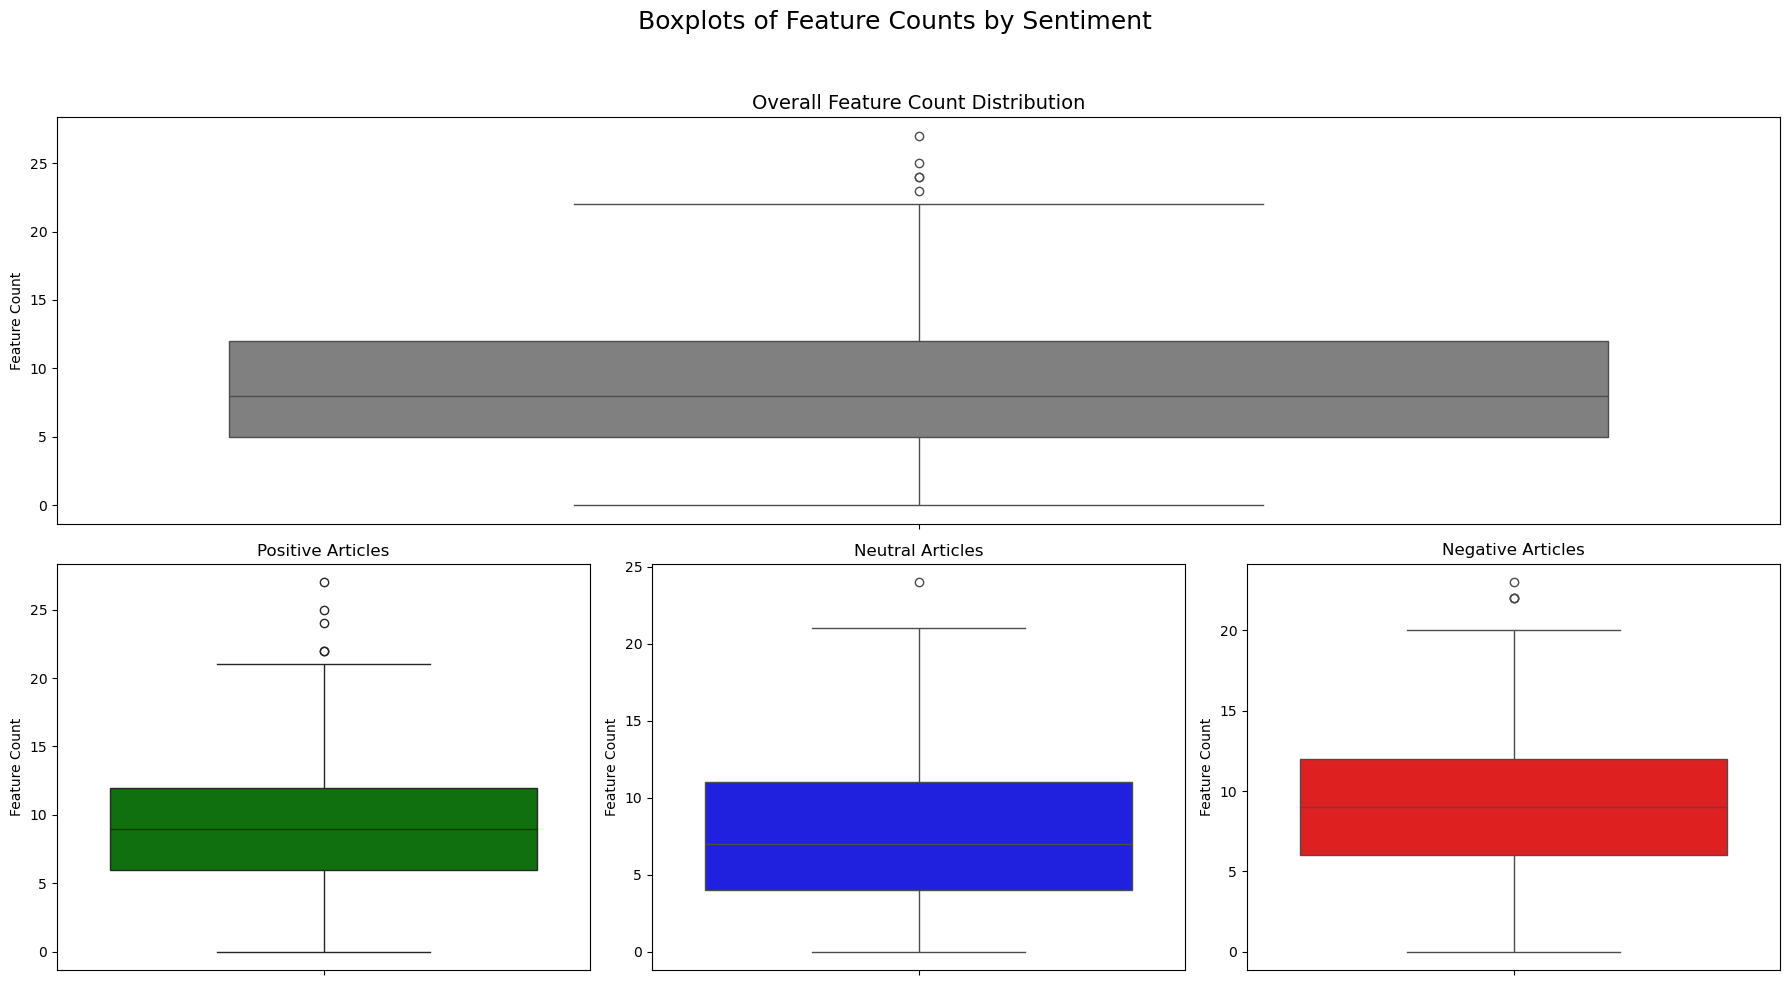

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you're not modifying the original df unintentionally
features = df.drop(columns=["Sentiment_Score", "Sentiment_Calc"]).copy()
features["feature_count"] = features.sum(axis=1)

# Assuming features_pos, features_neu, features_neg are already defined and include 'feature_count'
# Now we set up the layout: 1 row with 1 plot, 1 row with 3 plots
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3)
fig.suptitle('Boxplots of Feature Counts by Sentiment', fontsize=18)

# Overall (Top row spanning all 3 columns)
ax0 = fig.add_subplot(gs[0, :])
sns.boxplot(data=features["feature_count"], color="gray", ax=ax0)
ax0.set_title("Overall Feature Count Distribution", fontsize=14)
ax0.set_ylabel("Feature Count")
ax0.set_xlabel("")

# Positive (Bottom left)
ax1 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=features_pos["feature_count"], color="green", ax=ax1)
ax1.set_title("Positive Articles", fontsize=12)
ax1.set_ylabel("Feature Count")
ax1.set_xlabel("")

# Neutral (Bottom center)
ax2 = fig.add_subplot(gs[1, 1])
sns.boxplot(data=features_neu["feature_count"], color="blue", ax=ax2)
ax2.set_title("Neutral Articles", fontsize=12)
ax2.set_ylabel("Feature Count")
ax2.set_xlabel("")

# Negative (Bottom right)
ax3 = fig.add_subplot(gs[1, 2])
sns.boxplot(data=features_neg["feature_count"], color="red", ax=ax3)
ax3.set_title("Negative Articles", fontsize=12)
ax3.set_ylabel("Feature Count")
ax3.set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h3> Feature wise analysis </h3>

In [48]:
features_count = {}
features_count_pos = {}
features_count_neu = {}
features_count_neg = {}

In [49]:
features.columns

Index(['Success', 'High_Increase', 'Positive_Performance',
       'Positive_Sentiment', 'Positive_Emotions', 'Sold', 'Bullish',
       'Strength', 'Moderate_Increase', 'Increase', 'Revenue', 'Innovation',
       'good', 'Failure', 'Sharp_Decline', 'Moderate_Decline',
       'Negative_Financial_Impact', 'Negative_Emotions', 'Weakness',
       'Conflict', 'Bearish', 'Uncertainty', 'Elon_Musk', 'Supply',
       'Negative_Outcomes', 'Electricvehicle', 'Finance', 'EV_tech', 'tax',
       'late', 'risk', 'problem', 'feature_count'],
      dtype='object')

In [51]:
features = features.drop(columns = "feature_count")
features_pos = features_pos.drop(columns = "feature_count")
features_neu = features_neu.drop(columns = "feature_count")
features_neg = features_neg.drop(columns = "feature_count")

In [55]:
for feature in features.columns:
    features_count[feature] = 0
    features_count_pos[feature] = 0
    features_count_neu[feature] = 0
    features_count_neg[feature] = 0

In [57]:
for row in features.iterrows():
    for feature in features.columns :
        features_count[feature] += row[1][feature]

for row in features_pos.iterrows():
    for feature in features_pos.columns :
        features_count_pos[feature] += row[1][feature]

for row in features_neu.iterrows():
    for feature in features_neu.columns :
        features_count_neu[feature] += row[1][feature]

for row in features_neg.iterrows():
    for feature in features_neg.columns :
        features_count_neg[feature] += row[1][feature]

In [58]:
feature_dist = pd.DataFrame({"feature" : list(features_count.keys()), "count" : list(features_count.values())})
feature_dist_pos = pd.DataFrame({"feature" : list(features_count_pos.keys()), "count" : list(features_count_pos.values())})
feature_dist_neu = pd.DataFrame({"feature" : list(features_count_neu.keys()), "count" : list(features_count_neu.values())})
feature_dist_neg = pd.DataFrame({"feature" : list(features_count_neg.keys()), "count" : list(features_count_neg.values())})

/var/folders/31/89q4lfy92jx4lp6kwytq6lmw0000gn/T/ipykernel_11298/3287373978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="count", data=feature_dist.sort_values("count", ascending=False), ax=axes[0], palette="gray")
/var/folders/31/89q4lfy92jx4lp6kwytq6lmw0000gn/T/ipykernel_11298/3287373978.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="count", data=feature_dist_pos.sort_values("count", ascending=False), ax=axes[1], palette="Greens_d")
/var/folders/31/89q4lfy92jx4lp6kwytq6lmw0000gn/T/ipykernel_11298/3287373978.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

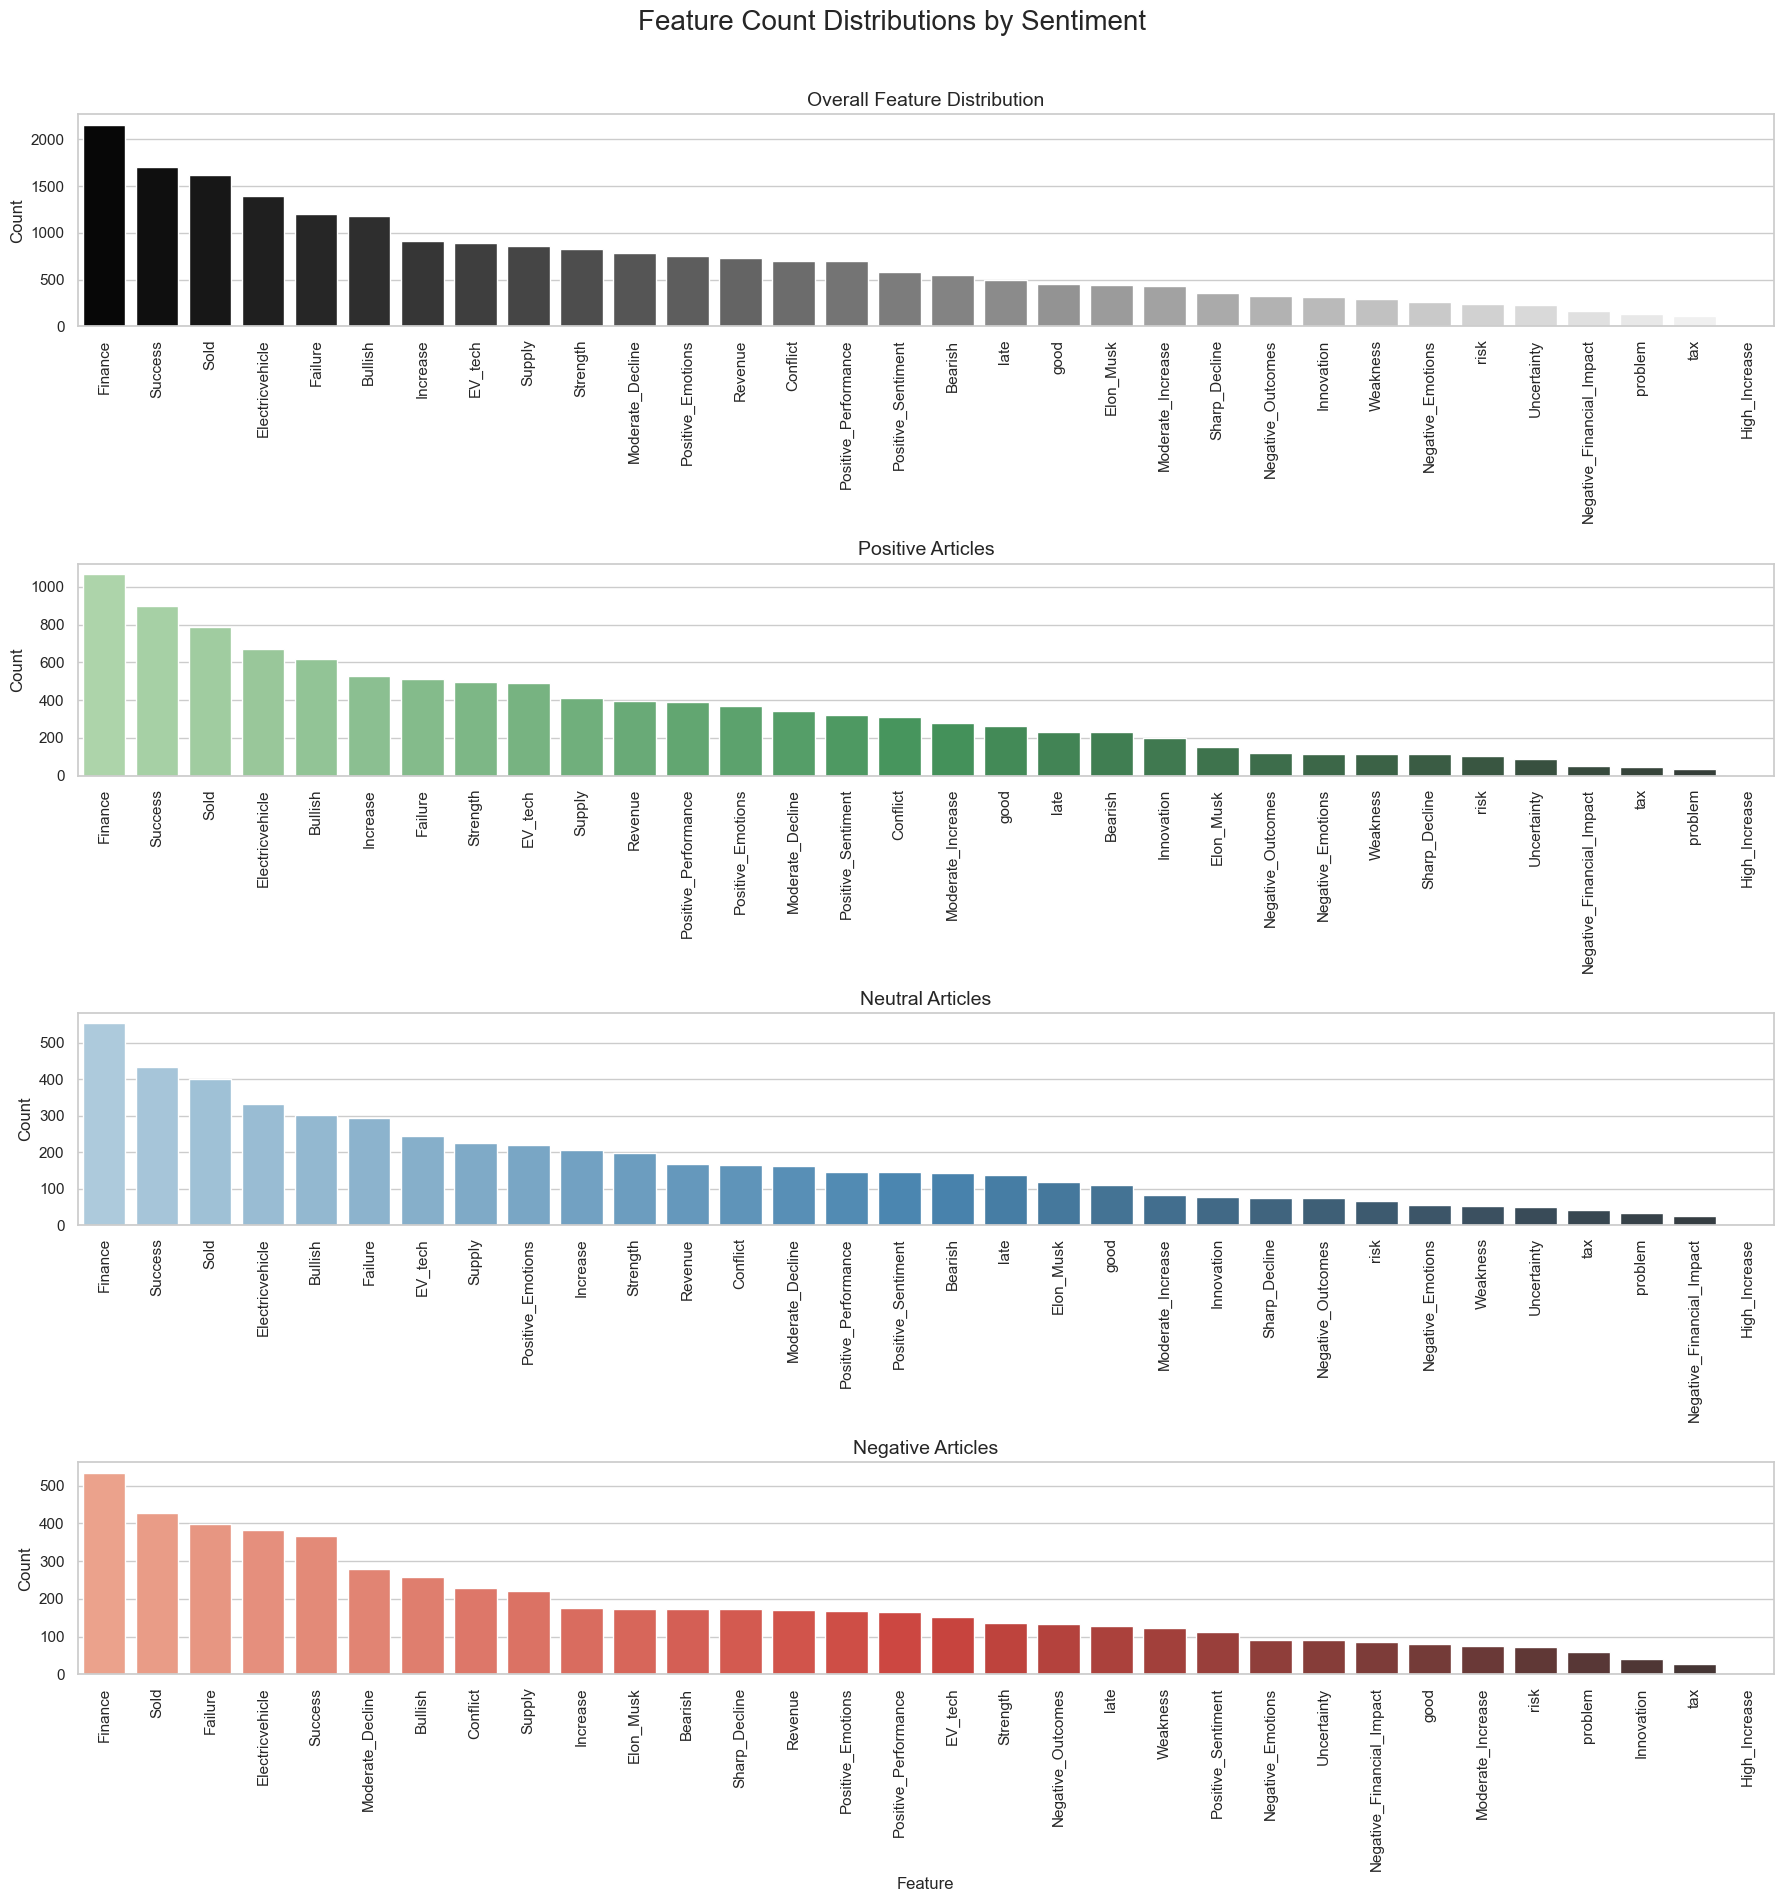

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 1, figsize=(18, 20))
fig.suptitle("Feature Count Distributions by Sentiment", fontsize=20)

# Plot 1: Overall Feature Distribution
sns.barplot(x="feature", y="count", data=feature_dist.sort_values("count", ascending=False), ax=axes[0], palette="gray")
axes[0].set_title("Overall Feature Distribution", fontsize=14)
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Positive Articles
sns.barplot(x="feature", y="count", data=feature_dist_pos.sort_values("count", ascending=False), ax=axes[1], palette="Greens_d")
axes[1].set_title("Positive Articles", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=90)

# Plot 3: Neutral Articles
sns.barplot(x="feature", y="count", data=feature_dist_neu.sort_values("count", ascending=False), ax=axes[2], palette="Blues_d")
axes[2].set_title("Neutral Articles", fontsize=14)
axes[2].set_xlabel("")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=90)

# Plot 4: Negative Articles
sns.barplot(x="feature", y="count", data=feature_dist_neg.sort_values("count", ascending=False), ax=axes[3], palette="Reds_d")
axes[3].set_title("Negative Articles", fontsize=14)
axes[3].set_xlabel("Feature")
axes[3].set_ylabel("Count")
axes[3].tick_params(axis='x', rotation=90)

# Adjust layout to fit
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


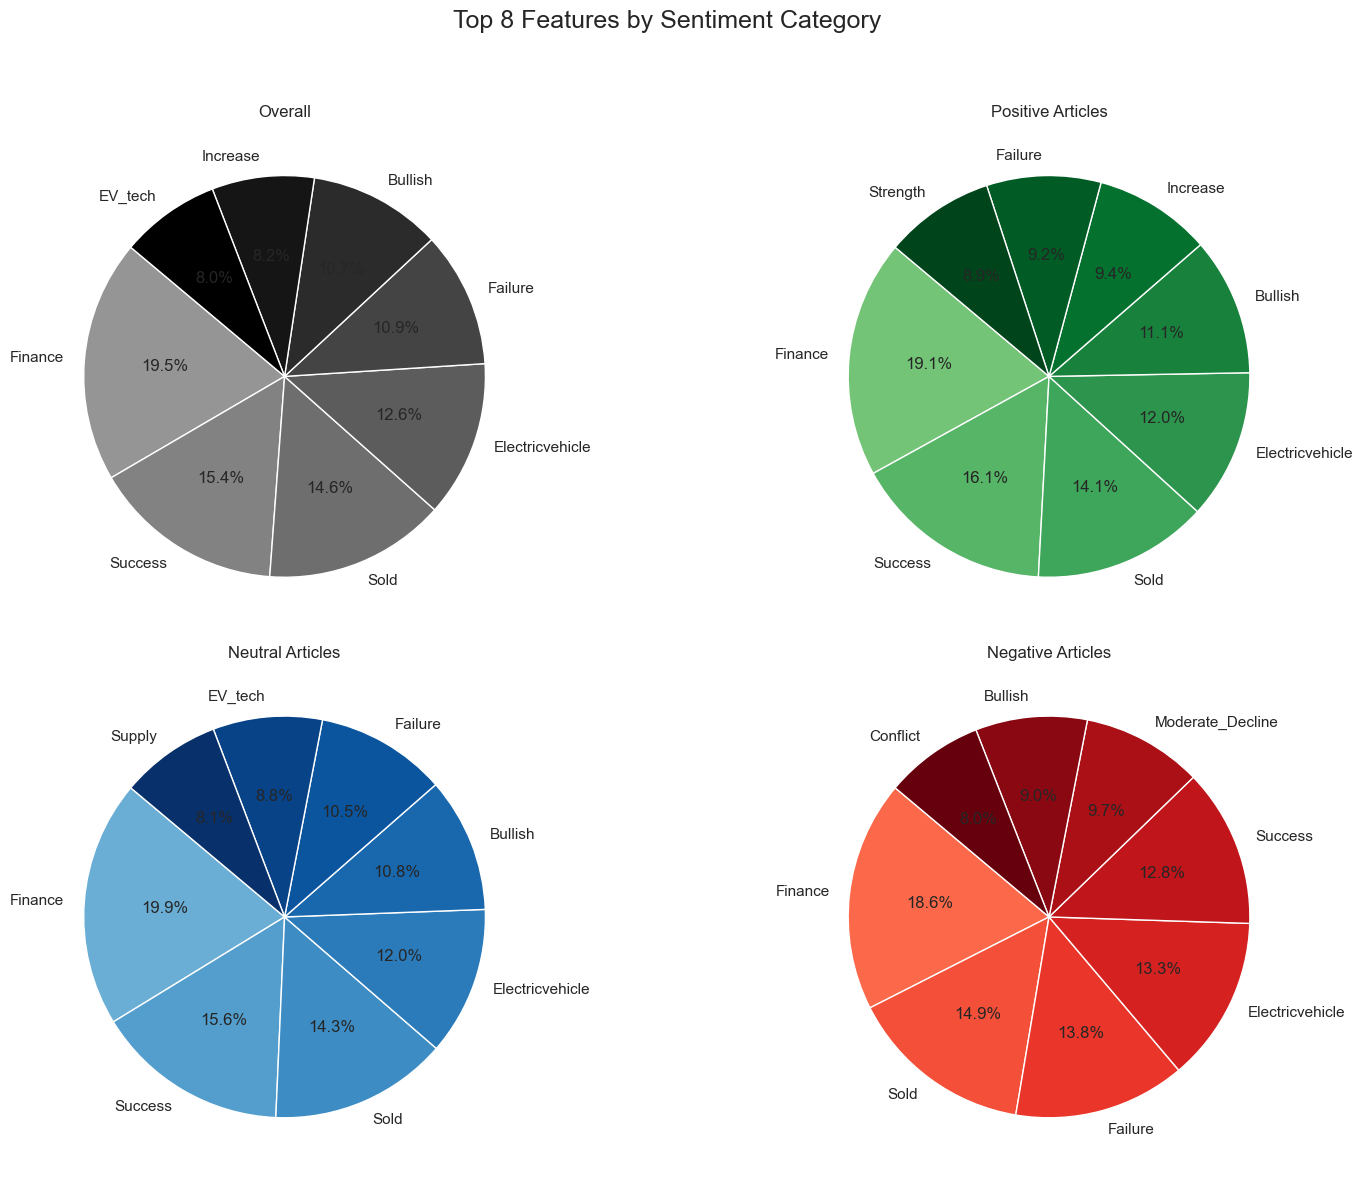

In [61]:
import matplotlib.pyplot as plt

# Set up 4 pie charts (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Top 8 Features by Sentiment Category", fontsize=18)

# Plot 1: Overall
top_features = feature_dist.sort_values("count", ascending=False).head(8)
axes[0, 0].pie(top_features["count"], labels=top_features["feature"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Greys(np.linspace(0.5, 1, 8)))
axes[0, 0].set_title("Overall")

# Plot 2: Positive
top_features_pos = feature_dist_pos.sort_values("count", ascending=False).head(8)
axes[0, 1].pie(top_features_pos["count"], labels=top_features_pos["feature"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Greens(np.linspace(0.5, 1, 8)))
axes[0, 1].set_title("Positive Articles")

# Plot 3: Neutral
top_features_neu = feature_dist_neu.sort_values("count", ascending=False).head(8)
axes[1, 0].pie(top_features_neu["count"], labels=top_features_neu["feature"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Blues(np.linspace(0.5, 1, 8)))
axes[1, 0].set_title("Neutral Articles")

# Plot 4: Negative
top_features_neg = feature_dist_neg.sort_values("count", ascending=False).head(8)
axes[1, 1].pie(top_features_neg["count"], labels=top_features_neg["feature"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Reds(np.linspace(0.5, 1, 8)))
axes[1, 1].set_title("Negative Articles")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
